# Exploratory Data Analysis (EDA)

Notebook ini berisi analisis data eksplorasi sederhana untuk dua dataset utama dalam proyek ini:
1.  **Global Health Statistics**: Dataset terstruktur berisi metrik kesehatan dan sosio-ekonomi.
2.  **Medical Abstracts**: Dataset tidak terstruktur berisi teks abstrak medis dan label kategorinya.

## 1. Inisialisasi dan Import Library

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from wordcloud import WordCloud

# Mengatur gaya visualisasi
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

## 2. Analisis Dataset Terstruktur: Global Health Statistics

In [4]:
# Ganti 'Global_Health_Statistics.csv' dengan nama file Anda yang sebenarnya jika berbeda
health_stats_path = 'data/Global Health Statistics.csv'

try:
    df_health = pd.read_csv(health_stats_path)
    print("Dataset Statistik Kesehatan berhasil dimuat.")
    display(df_health.head())
except FileNotFoundError:
    print(f"Error: File tidak ditemukan di '{health_stats_path}'. Pastikan file ada di folder 'data'.")

Dataset Statistik Kesehatan berhasil dimuat.


,Country,Year,Disease Name,Disease Category,Prevalence Rate (%),Incidence Rate (%),Mortality Rate (%),Age Group,Gender,Population Affected,...,Hospital Beds per 1000,Treatment Type,Average Treatment Cost (USD),Availability of Vaccines/Treatment,Recovery Rate (%),DALYs,Improvement in 5 Years (%),Per Capita Income (USD),Education Index,Urbanization Rate (%)
0,Italy,2013,Malaria,Respiratory,0.95,1.55,8.42,0-18,Male,471007,...,7.58,Medication,21064,No,91.82,4493,2.16,16886,0.79,86.02
1,France,2002,Ebola,Parasitic,12.46,8.63,8.75,61+,Male,634318,...,5.11,Surgery,47851,Yes,76.65,2366,4.82,80639,0.74,45.52
2,Turkey,2015,COVID-19,Genetic,0.91,2.35,6.22,36-60,Male,154878,...,3.49,Vaccination,27834,Yes,98.55,41,5.81,12245,0.41,40.20
3,Indonesia,2011,Parkinson's Disease,Autoimmune,4.68,6.29,3.99,0-18,Other,446224,...,8.44,Surgery,144,Yes,67.35,3201,2.22,49336,0.49,58.47
4,Italy,2013,Tuberculosis,Genetic,0.83,13.59,7.01,61+,Male,472908,...,5.90,Medication,8908,Yes,50.06,2832,6.93,47701,0.50,48.14


In [5]:
if 'df_health' in locals():
    print("Informasi Dasar Dataset:")
    df_health.info()
    
    print("\nStatistik Deskriptif untuk Kolom Numerik:")
    display(df_health.describe())

Informasi Dasar Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 22 columns):
 #   Column                              Non-Null Count    Dtype  
---  ------                              --------------    -----  
 0   Country                             1000000 non-null  object 
 1   Year                                1000000 non-null  int64  
 2   Disease Name                        1000000 non-null  object 
 3   Disease Category                    1000000 non-null  object 
 4   Prevalence Rate (%)                 1000000 non-null  float64
 5   Incidence Rate (%)                  1000000 non-null  float64
 6   Mortality Rate (%)                  1000000 non-null  float64
 7   Age Group                           1000000 non-null  object 
 8   Gender                              1000000 non-null  object 
 9   Population Affected                 1000000 non-null  int64  
 10  Healthcare Access (%)               1000000 non-null  

,Year,Prevalence Rate (%),Incidence Rate (%),Mortality Rate (%),Population Affected,Healthcare Access (%),Doctors per 1000,Hospital Beds per 1000,Average Treatment Cost (USD),Recovery Rate (%),DALYs,Improvement in 5 Years (%),Per Capita Income (USD),Education Index,Urbanization Rate (%)
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,2011.996999,10.047992,7.555005,5.049919,500735.427363,74.987835,2.747929,5.245931,25010.313665,74.496934,2499.144809,5.002593,50311.099835,0.650069,54.985212
std,7.217287,5.740189,4.298947,2.859427,288660.116648,14.436345,1.299067,2.742865,14402.279227,14.155168,1443.923798,2.888298,28726.959359,0.144472,20.214042
min,2000.000000,0.100000,0.100000,0.100000,1000.000000,50.000000,0.500000,0.500000,100.000000,50.000000,1.000000,0.000000,500.000000,0.400000,20.000000
25%,2006.000000,5.090000,3.840000,2.580000,250491.250000,62.470000,1.620000,2.870000,12538.000000,62.220000,1245.000000,2.500000,25457.000000,0.530000,37.470000
50%,2012.000000,10.040000,7.550000,5.050000,501041.000000,75.000000,2.750000,5.240000,24980.000000,74.470000,2499.000000,5.000000,50372.000000,0.650000,54.980000
75%,2018.000000,15.010000,11.280000,7.530000,750782.000000,87.490000,3.870000,7.620000,37493.000000,86.780000,3750.000000,7.510000,75195.000000,0.780000,72.510000
max,2024.000000,20.000000,15.000000,10.000000,1000000.000000,100.000000,5.000000,10.000000,50000.000000,99.000000,5000.000000,10.000000,100000.000000,0.900000,90.000000


In [6]:
if 'df_health' in locals():
    print("\nNilai Unik untuk Setiap Kolom (jika < 30 unik):")
    for column in df_health.columns:
        unique_values = df_health[column].unique()
        num_unique = len(unique_values)
        if num_unique < 30:
            print(f"\n- Kolom '{column}' ({num_unique} unik):")
            print(unique_values)
        else:
            print(f"\n- Kolom '{column}' memiliki {num_unique} nilai unik (terlalu banyak untuk ditampilkan).")


Nilai Unik untuk Setiap Kolom (jika < 30 unik):

- Kolom 'Country' (20 unik):
['Italy' 'France' 'Turkey' 'Indonesia' 'Saudi Arabia' 'USA' 'Nigeria'
 'Australia' 'Canada' 'Mexico' 'China' 'South Africa' 'Japan' 'UK'
 'Russia' 'Brazil' 'Germany' 'India' 'Argentina' 'South Korea']

- Kolom 'Year' (25 unik):
[2013 2002 2015 2011 2007 2000 2006 2009 2004 2020 2024 2001 2019 2014
 2021 2010 2003 2022 2005 2008 2017 2023 2012 2016 2018]

- Kolom 'Disease Name' (20 unik):
['Malaria' 'Ebola' 'COVID-19' "Parkinson's Disease" 'Tuberculosis'
 'Dengue' 'Rabies' 'Cholera' 'Leprosy' 'Cancer' 'Diabetes' 'Measles'
 'Zika' "Alzheimer's Disease" 'Polio' 'Hypertension' 'Asthma' 'HIV/AIDS'
 'Influenza' 'Hepatitis']

- Kolom 'Disease Category' (11 unik):
['Respiratory' 'Parasitic' 'Genetic' 'Autoimmune' 'Bacterial'
 'Cardiovascular' 'Neurological' 'Chronic' 'Metabolic' 'Infectious'
 'Viral']

- Kolom 'Prevalence Rate (%)' memiliki 1991 nilai unik (terlalu banyak untuk ditampilkan).

- Kolom 'Incidence Rate

### Analisis Pentingnya Fitur (Feature Importance)

Untuk memahami fitur mana yang paling berpengaruh terhadap `Mortality Rate (%)`, kita akan melatih model sederhana (Random Forest Regressor) dan memvisualisasikan *feature importance*. Ini memberikan gambaran awal tentang prediktor terkuat dalam dataset.

Melatih model Random Forest untuk mengekstrak feature importance (menggunakan 10% data)...
Pelatihan selesai.
Pelatihan selesai.


/tmp/ipykernel_97055/2611300538.py:38: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




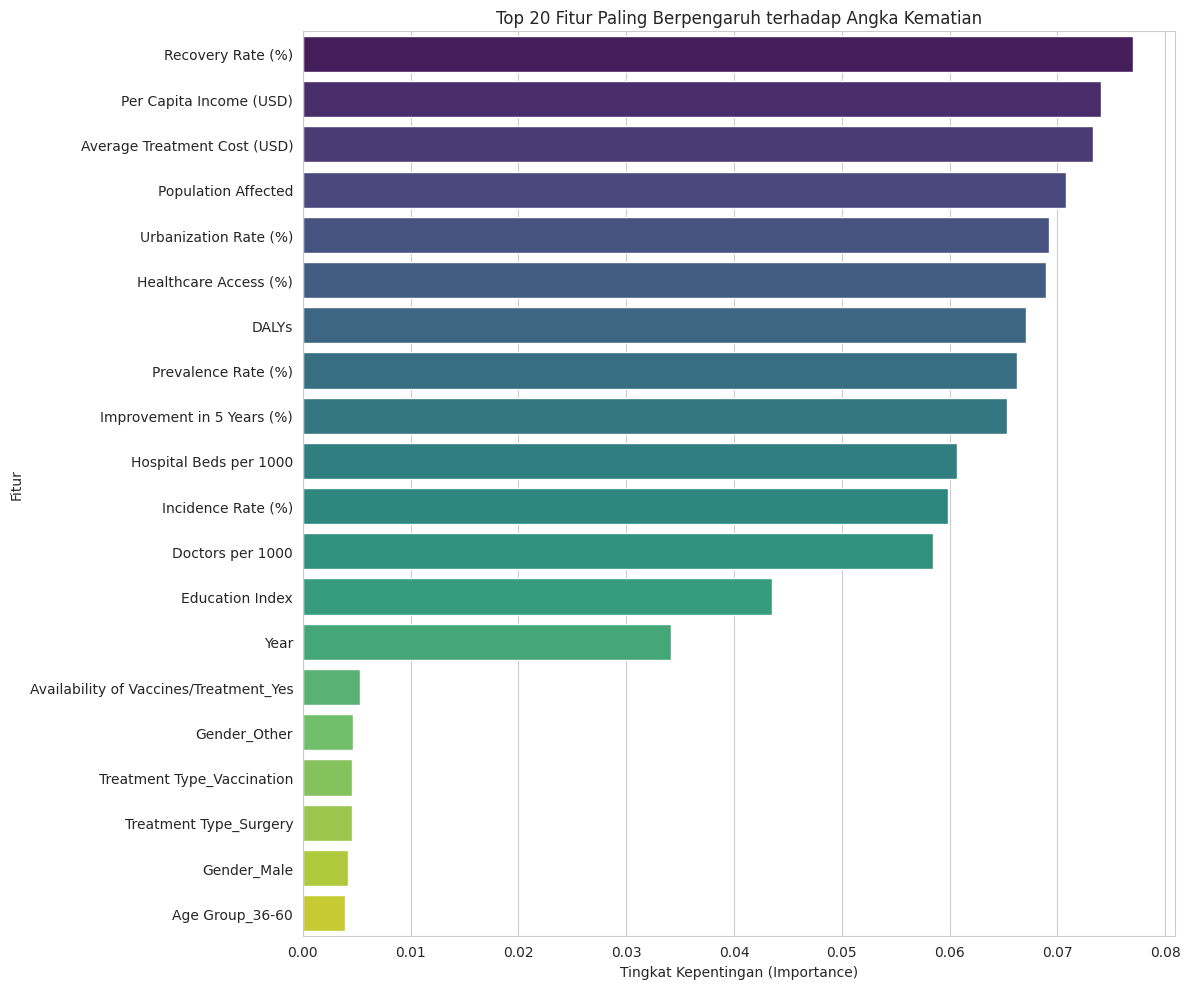

In [10]:
if 'df_health' in locals():
    from sklearn.ensemble import RandomForestRegressor
    from sklearn.model_selection import train_test_split

    # Salin dataframe agar tidak mengubah yang asli
    df_model = df_health.copy()

    # Hapus kolom yang tidak relevan untuk pemodelan sederhana ini (seperti ID atau nama spesifik)
    df_model = df_model.drop(['Disease Name'], axis=1)

    # Ubah kolom kategorikal menjadi numerik menggunakan One-Hot Encoding
    categorical_cols = df_model.select_dtypes(include=['object']).columns
    df_model_encoded = pd.get_dummies(df_model, columns=categorical_cols, drop_first=True)

    # Pisahkan fitur (X) dan target (y)
    X = df_model_encoded.drop('Mortality Rate (%)', axis=1)
    y = df_model_encoded['Mortality Rate (%)']

    # Latih model Random Forest
    # Menggunakan subset data (10%) agar proses berjalan cepat di notebook
    X_sample, _, y_sample, _ = train_test_split(X, y, train_size=0.1, random_state=42)
    
    print("Melatih model Random Forest untuk mengekstrak feature importance (menggunakan 10% data)...")
    rf_model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1, max_depth=10)
    rf_model.fit(X_sample, y_sample)
    print("Pelatihan selesai.")

    # Dapatkan feature importance
    importances = rf_model.feature_importances_
    feature_names = X_sample.columns
    
    # Buat DataFrame untuk visualisasi
    feature_importance_df = pd.DataFrame({'feature': feature_names, 'importance': importances})
    feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)

    # Visualisasikan 20 fitur teratas
    plt.figure(figsize=(12, 10))
    sns.barplot(x='importance', y='feature', data=feature_importance_df.head(20), palette='viridis')
    plt.title('Top 20 Fitur Paling Berpengaruh terhadap Angka Kematian')
    plt.xlabel('Tingkat Kepentingan (Importance)')
    plt.ylabel('Fitur')
    plt.tight_layout()
    plt.show()

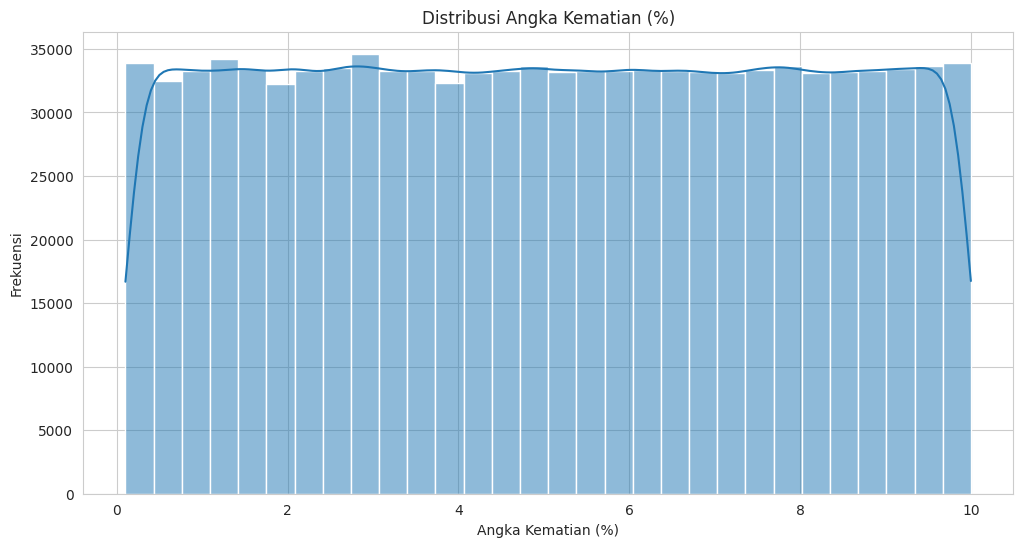

In [7]:
if 'df_health' in locals():
    # Visualisasi Distribusi Angka Kematian
    plt.figure(figsize=(12, 6))
    sns.histplot(df_health['Mortality Rate (%)'], kde=True, bins=30)
    plt.title('Distribusi Angka Kematian (%)')
    plt.xlabel('Angka Kematian (%)')
    plt.ylabel('Frekuensi')
    plt.show()

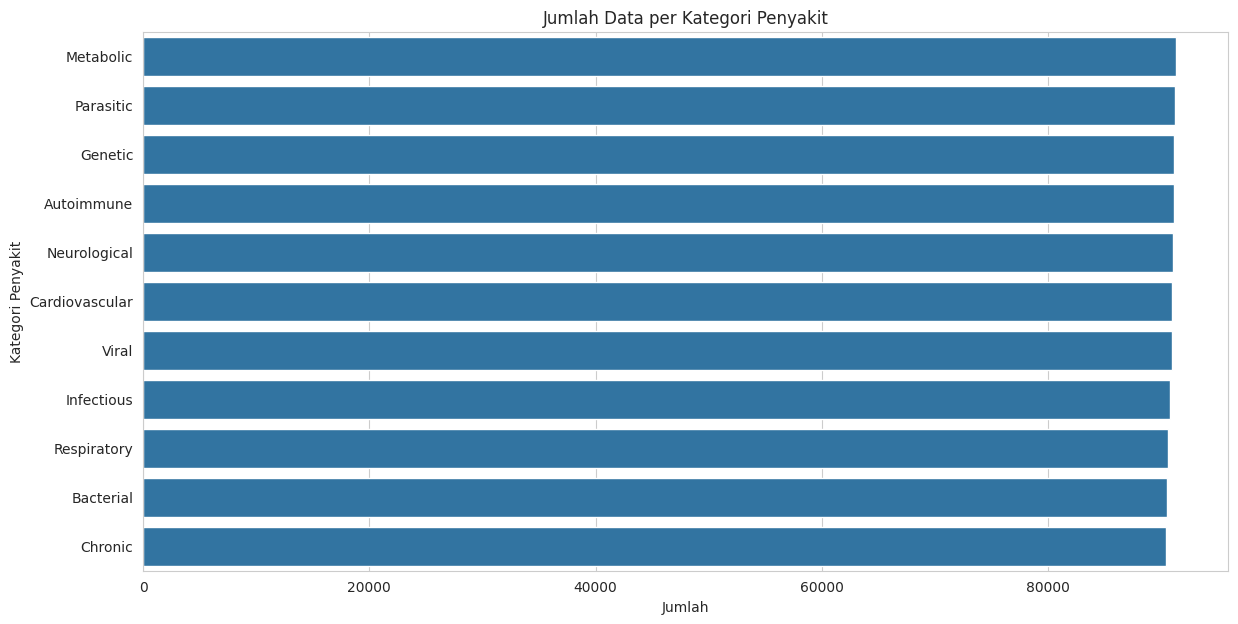

In [8]:
if 'df_health' in locals():
    # Visualisasi Jumlah Data per Kategori Penyakit
    plt.figure(figsize=(14, 7))
    sns.countplot(y=df_health['Disease Category'], order=df_health['Disease Category'].value_counts().index)
    plt.title('Jumlah Data per Kategori Penyakit')
    plt.xlabel('Jumlah')
    plt.ylabel('Kategori Penyakit')
    plt.show()

## 3. Analisis Dataset Tidak Terstruktur: Medical Abstracts

Sekarang kita akan menganalisis dataset abstrak medis.

In [11]:
abstracts_path = 'data/medical_text_classification_fake_dataset.csv'

try:
    df_abstracts = pd.read_csv(abstracts_path)
    print("Dataset Abstrak Medis berhasil dimuat.")
    display(df_abstracts.head())
except FileNotFoundError:
    print(f"Error: File tidak ditemukan di '{abstracts_path}'. Pastikan file ada di folder 'data'.")

Dataset Abstrak Medis berhasil dimuat.


,text,label
0,Immunotherapy has shown promise in treating me...,Cancer
1,The relationship between obesity and type 2 di...,Diabetes
2,Recent trials show the efficacy of SGLT2 inhib...,Diabetes
3,BRCA mutations significantly increase the risk...,Cancer
4,Recent trials show the efficacy of SGLT2 inhib...,Diabetes


In [12]:
if 'df_abstracts' in locals():
    print("\nNilai Unik untuk Setiap Kolom (jika < 30 unik):")
    for column in df_abstracts.columns:
        unique_values = df_abstracts[column].unique()
        num_unique = len(unique_values)
        if num_unique < 30:
            print(f"\n- Kolom '{column}' ({num_unique} unik):")
            print(unique_values)
        else:
            print(f"\n- Kolom '{column}' memiliki {num_unique} nilai unik (terlalu banyak untuk ditampilkan).")


Nilai Unik untuk Setiap Kolom (jika < 30 unik):

- Kolom 'text' (20 unik):
['Immunotherapy has shown promise in treating metastatic melanoma.'
 'The relationship between obesity and type 2 diabetes is well established.'
 'Recent trials show the efficacy of SGLT2 inhibitors in reducing HbA1c.'
 'BRCA mutations significantly increase the risk of breast and ovarian cancers.'
 'Beta-blockers are essential for managing chronic heart failure.'
 'Chemotherapy and radiation therapy are standard treatments for many cancers.'
 'Angioplasty is often used to restore blood flow in blocked arteries.'
 'Insulin therapy remains the cornerstone for type 1 diabetes treatment.'
 'Cancer genomics helps personalize treatment for better outcomes.'
 'Ambulatory blood pressure monitoring provides better diagnosis of hypertension.'
 'Early detection through screening can improve cancer survival rates.'
 'Salt reduction is an effective strategy for blood pressure control.'
 'Diet and exercise are essential com

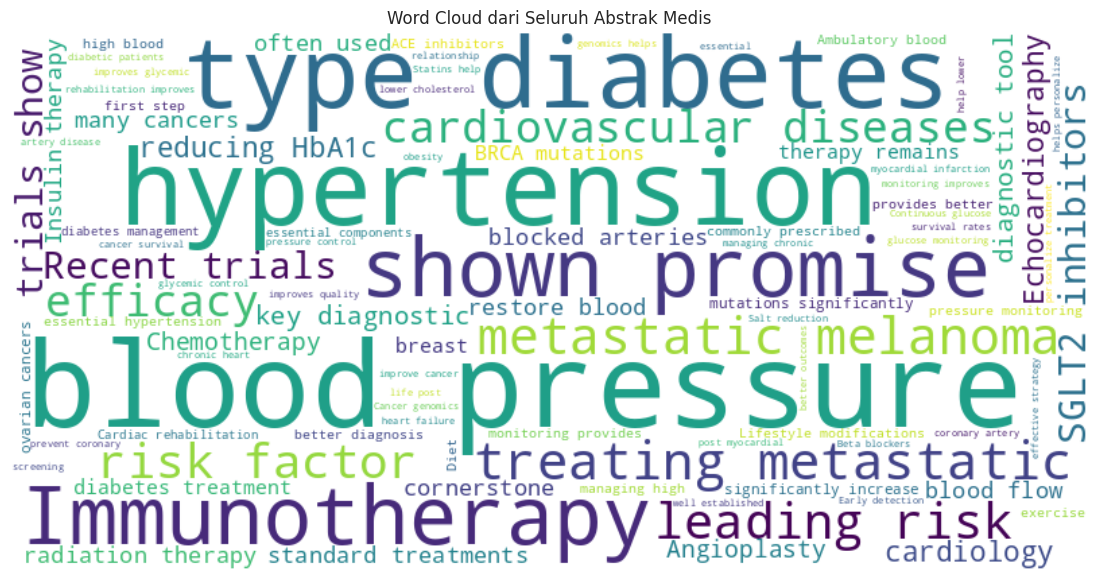

In [14]:
if 'df_abstracts' in locals():
    # Membuat Word Cloud dari semua teks abstrak
    all_text = ' '.join(df_abstracts['text'].dropna())
    
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)
    
    plt.figure(figsize=(15, 7))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('Word Cloud dari Seluruh Abstrak Medis')
    plt.show()